# Aula 6 - Visualização e Story Telling

- [ ] Utilizar 2 técnicas de visualização
	- [ ] Infográfico:
		- [ ] Fazer um infográfico mostrando o perfil das paradas
			- [ ] probabilidade condicional de ser preso por raça
			- [ ] Perfil mais parado
	- [ ] Gráfico:
		- [ ] Fazer um gráfico de pizza mostrando a violation cometida
		- [ ] Fazer um gráfico de pizza mostrando a violation cometida por pessoas presas

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

In [68]:
csv_path = "../data/police.csv"
df = pd.read_csv(csv_path)

In [69]:
from etl.main import PoliceDatasetEtl

police_dataset_etl = PoliceDatasetEtl(df.copy())
featured_df = police_dataset_etl.clean_transform()

## Infográfico do Perfil das Paradas

## Gráficos de Violation

In [70]:
violations_df = featured_df.copy()
violations_df.violation = violations_df.violation.fillna("No Violation")
violations_arrested_df = violations_df.copy()
violations_arrested_df = violations_arrested_df[violations_arrested_df.is_arrested == True]

violations_grouped = violations_df.groupby("violation").counter.count()
violations_arrested_grouped = violations_arrested_df.groupby("violation").counter.count()
display(violations_grouped)
display(violations_arrested_grouped)

violation
Equipment              11020
Moving violation       16224
No Violation            5333
Other                   4317
Registration/plates     3432
Seat belt               2952
Speeding               48463
Name: counter, dtype: int64

violation
Equipment              635
Moving violation       910
Other                  339
Registration/plates    334
Seat belt               74
Speeding               637
Name: counter, dtype: int64

array([[  635, 11020],
       [  910, 16224],
       [  339,  5333],
       [  334,  4317],
       [   74,  3432],
       [  637,  2952]])

7

Text(0.5, 1.0, 'Violations')

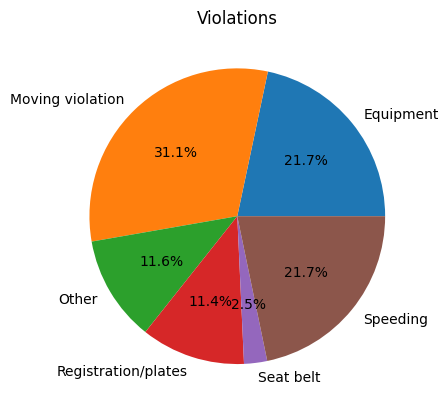

In [71]:
violations_data = np.array([[x[0], x[1]] for x in zip(violations_arrested_grouped.to_list(), violations_grouped.to_list())])
violations_label = violations_grouped.index.to_list()
size = len(violations_label)
display(violations_data)
display(size)


#plt.pie(violations_grouped.to_list(), labels=violations_grouped.index.to_list(), autopct="%1.1f%%")
#plt.title("Violations")

plt.pie(violations_arrested_grouped.to_list(), labels=violations_arrested_grouped.index.to_list(), autopct="%1.1f%%")
plt.title("Violations")

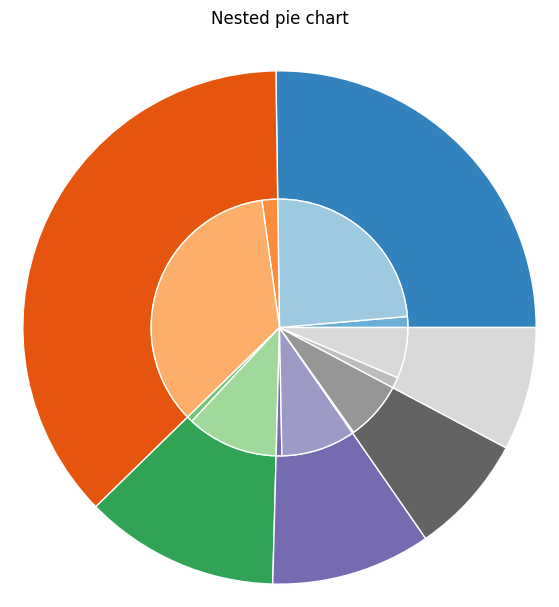

In [72]:
# normalizing data to 2 pi 
norm = violations_data / np.sum(violations_data)*2 * np.pi 
   
# obtaining ordinates of bar edges 
left = np.cumsum(np.append(0,  
                           norm.flatten()[:-1])).reshape(violations_data.shape) 
   
# Creating color scale 
cmap = plt.get_cmap("tab20c") 
outer_colors = cmap(np.arange(6)*4) 
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 
                              10, 12, 13, 15, 
                              17, 18, 20 ])) 
   
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7), 
                       subplot_kw = dict(polar = True)) 
   
ax.bar(x = left[:, 0], 
       width = norm.sum(axis = 1), 
       bottom = 1-size, 
       height = size, 
       color = outer_colors,  
       edgecolor ='w', 
       linewidth = 1, 
       align ="edge") 
   
ax.bar(x = left.flatten(), 
       width = norm.flatten(), 
       bottom = 1-2 * size, 
       height = size, 
       color = inner_colors, 
       edgecolor ='w', 
       linewidth = 1, 
       align ="edge") 
   
ax.set(title ="Nested pie chart") 
ax.set_axis_off() 
   
# show plot 
plt.show() 